## Stock Prediction for high Price in a day

In [1]:
from nsepy import get_history
from datetime import datetime
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Defining start and end date

In [2]:
start = datetime(2021, 6, 1)
end = datetime(2021, 6, 22)

### Example of MRF

In [19]:
data = get_history(symbol='MRF',
                   start=start,
                   end=end)

In [18]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-06-01,MRF,EQ,83641.40,83643.4,84800.00,82811.8,82900.0,83083.45,83667.84,11331,9.480403e+13,7391,2781,0.2454
2021-06-02,MRF,EQ,83083.45,82800.0,84776.45,82800.0,84499.0,84432.65,83798.67,10170,8.522325e+13,6268,2812,0.2765
2021-06-03,MRF,EQ,84432.65,84705.0,85086.00,83810.0,84589.0,84471.00,84547.85,9669,8.174932e+13,6425,2609,0.2698
2021-06-04,MRF,EQ,84471.00,84850.0,85336.00,84240.0,84950.0,84918.70,84821.65,11134,9.444043e+13,6861,3538,0.3178
2021-06-07,MRF,EQ,84918.70,85598.9,87300.00,82250.0,82310.0,82400.50,84076.57,69851,5.872832e+14,41886,12683,0.1816


### Saving data to csv for future reference

In [22]:
data.to_csv('mrf.csv')

In [23]:
df = pd.read_csv('mrf.csv')

In [7]:
actual_price = df.tail(1)
actual_price

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
15,2021-06-22,MRF,EQ,81777.05,82500.0,82500.0,81500.0,81600.0,81747.25,82032.74,7101,5.825145e+13,3849,2235,0.3147


In [8]:
df = df.head(len(df)-1)

In [9]:
days = list()
high_prices = list()

In [10]:
df_days = df.loc[:,'Date']
df_high_prices = df.loc[:,'High']

### Converting date to number

In [11]:
for day in df_days:
    days.append([int(day.split('-')[2])])
for high_price in df_high_prices:
    high_prices.append(float(high_price))
    

In [12]:
days

[[1],
 [2],
 [3],
 [4],
 [7],
 [8],
 [9],
 [10],
 [11],
 [14],
 [15],
 [16],
 [17],
 [18],
 [21]]

In [13]:
high_prices

[84800.0,
 84776.45,
 85086.0,
 85336.0,
 87300.0,
 82455.15,
 81989.0,
 82325.95,
 82818.45,
 83127.95,
 83357.75,
 83150.0,
 83295.85,
 83147.4,
 82250.0]

### Training RBF model to predict high price on a day

In [24]:
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days,high_prices)

SVR(C=1000.0, gamma=0.85)

### Plotting graph

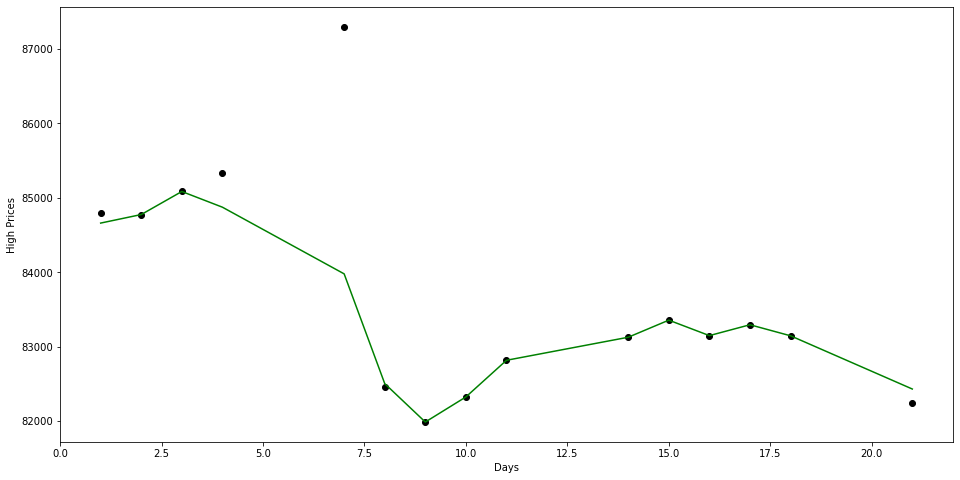

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(days,high_prices,color='black',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label='RBF Model')
plt.xlabel('Days')
plt.ylabel('High Prices')
plt.show()

### Predicted Price

In [27]:
day = [[23]]
print('The RBF predicted price:',rbf_svr.predict(day))

The RBF predicted price: [83399.40121183]


### Actual Price

In [26]:
print('Actual price', actual_price['High'])

Actual price 15    82500.0
Name: High, dtype: float64
